# <center>Quality/Complexity of Computer Science Programs</center>

<center>
    <b>Gregory L. Heileman$^\dagger$ and Hayden W. Free$^\ddagger$ and Johnny and Camden</b> <br>
    $^\dagger$Department of Electrical & Computer Engineering <br>
    $^\ddagger$Department of Computer Science <br>
    University of Kentucky <br>
    {greg.heileman, wgthompson, orhan.abar,  hayden.free}@uky.edu
</center>

## Introduction
In this notebook we compare the complexity of computer science programs across the U.S. News & World report rankings.

This analysis is based upon recently developed curricular complexity metrics (see <cite data-cite="he:18">Heileman, et. al, (2018)</cite>).  Research in this area demonstrates that according to these complexity metrics, engineering programs tend to be among the most complex univeristy curricula. This is attributed to the large number of prerequisites that accompany many of the courses in engineering programs, as well as the long prerequisite chains that tend to exist in these curricula. This notebook makes use use of a Curricular Analytics toolbox that was built to compute these curricular complexity metrics <cite data-cite="he:18">Heileman, et. al. (2019)</cite>).    

The following Julia packages are needed for this analyisis:

In [1]:
########## use this to run CA locally
using Pkg
if split(pwd(),Base.Filesystem.path_separator)[end] != "CurricularAnalytics.jl"
    cd("../../../CurricularAnalytics.jl/")
end
pkg"activate ."
cd("../CA-Notebooks/Quality-Complexity/Computer Science")
############
using CurricularAnalytics
using Glob
using CSV
using DataFrames
using Statistics
using StatsPlots

┌ Info: Recompiling stale cache file /Users/heileman/.julia/compiled/v1.1/CurricularAnalytics/pJfqI.ji for CurricularAnalytics [593ffa3d-269e-5d81-88bc-c3b6809c35a6]
└ @ Base loading.jl:1184


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13523294295486066937\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6965129041308068689\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13523294295486066937\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Complexity of Computer Science Curricula
To get a sense of the diversity in the complexities of undergraduate computer science program curricula, below we provide  visulizations of a few computer science programs.

In [2]:
curric = read_csv("./tier_top/Stanford-CS.csv")
visualize(curric, notebook=true)

┌ Warning: Accessing `scope.id` is deprecated, use `scopeid(scope)` instead.
│   caller = ip:0x0
└ @ Core :-1


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":true,\"edit\":false},\"curriculum\":{\"name\":\"Computer Science\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"CS 106B\",\"metrics\":{},\"nameSub\":\"Programming Abstractions\",\"id\":5,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 103\",\"metrics\":{},\"nameSub\":\"Mathematical Foundations of Computing\",\"id\":13,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"MATH 19\",\"metrics\":{},\"nameSub\":\"Calculus\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"Phys 21\",\"metrics\":{},\"nameSub\":\"Mechanics, Fluids, and Heat\",\"id\":26,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"THINK\",\"id\":3,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":14,\"type\":\"prereq\"}],\"name\":\"CS 107\",\"metrics\":{},\"nameSub\":\"Computer Organization and Systems\",\"id\":14,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":13,\"target_id\":21,\"type\":\"prereq\"}],\"name\":\"CS 109\",\"metrics\":{},\"nameSub\":\"Introduction to Probability for Computer Scientists\",\"id\":21,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\"MATH 20\",\"metrics\":{},\"nameSub\":\"Calculus\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":13,\"target_id\":24,\"type\":\"prereq\"}],\"name\":\"CS 154\",\"metrics\":{},\"nameSub\":\"Introduction to Automata and Complexity Theory\",\"id\":24,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":26,\"target_id\":29,\"type\":\"prereq\"}],\"name\":\"Phys 23\",\"metrics\":{},\"nameSub\":\"Electricity, Magnetism, and Optics\",\"id\":29,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":14,\"target_id\":22,\"type\":\"prereq\"}],\"name\":\"CS 110\",\"metrics\":{},\"nameSub\":\"Principles of Computer Systems\",\"id\":22,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":13,\"target_id\":27,\"type\":\"prereq\"},{\"source_id\":21,\"target_id\":27,\"type\":\"prereq\"}],\"name\":\"CS 161\",\"metrics\":{},\"nameSub\":\"Design and Analysis of Algorithms\",\"id\":27,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"MATH 21\",\"metrics\":{},\"nameSub\":\"Calculus\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":13,\"target_id\":25,\"type\":\"prereq\"},{\"source_id\":14,\"target_id\":25,\"type\":\"prereq\"}],\"name\":\"CS 145\",\"metrics\":{},\"nameSub\":\"Data Management and Data Systems\",\"id\":25,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Intro Stem\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":3},{\"name\":\"Term 4\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":22,\"target_id\":33,\"type\":\"prereq\"}],\"name\":\"CS 144\",\"metrics\":{},\"nameSub\":\"Introduction to Computer Networking\",\"id\":33,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":27,\"target_id\":41,\"type\":\"prereq\"},{\"source_id\":22,\"target_id\":41,\"type\":\"prereq\"}],\"name\":\"CS 194\",\"metrics\":{},\"nameSub\":\"Software Project\",\"id\":41,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":13

In [7]:
dp = read_csv("./tier_middle/University_of_Kentucky-CS.csv")
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Computer Science\",\"dp_name\":\"Computer Science BS\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"EGR 101\",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Engineering Exploration I\",\"id\":1,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"EGR 102\",\"metrics\":{\"centrality\":0,\"complexity\":16.0,\"blocking factor\":11,\"delay factor\":5.0},\"nameSub\":\"Fundamentals of Engineering Computing\",\"id\":2,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"UK Core - Comp. & Comm. I\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"MA 113\",\"metrics\":{\"centrality\":0,\"complexity\":15.0,\"blocking factor\":11,\"delay factor\":4.0},\"nameSub\":\"Calculus I\",\"id\":4,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":5,\"type\":\"coreq\"}],\"name\":\"PHY 231\",\"metrics\":{\"centrality\":6,\"complexity\":5.0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"General University Physics\",\"id\":5,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"coreq\"}],\"name\":\"PHY 241\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":0,\"delay factor\":3.0},\"nameSub\":\"General University Physics Laboratory\",\"id\":6,\"credits\":1,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":7,\"type\":\"coreq\"},{\"source_id\":10,\"target_id\":7,\"type\":\"coreq\"},{\"source_id\":2,\"target_id\":7,\"type\":\"prereq\"},{\"source_id\":5,\"target_id\":7,\"type\":\"coreq\"}],\"name\":\"EGR 103\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":0,\"delay factor\":3.0},\"nameSub\":\"Engineering Exploration II\",\"id\":7,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"UK Core - Comp. & Comm. II\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"MA 114\",\"metrics\":{\"centrality\":4,\"complexity\":6.0,\"blocking factor\":2,\"delay factor\":4.0},\"nameSub\":\"Calculus II\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHE 105\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"Gen College Chemistry I\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":11,\"type\":\"prereq\"}],\"name\":\"CS 215\",\"metrics\":{\"centrality\":23,\"complexity\":12.0,\"blocking factor\":7,\"delay factor\":5.0},\"nameSub\":\"Intr to Pgm Design Abstraction/Prob Solv\",\"id\":11,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":9,\"target_id\":12,\"type\":\"prereq\"}],\"name\":\"MA 213\",\"metrics\":{\"centrality\":4,\"complexity\":5.0,\"blocking factor\":1,\"delay factor\":4.0},\"nameSub\":\"Calculus III\",\"id\":12,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":11,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\"CS 216\",\"metrics\":{\"centrality\":9,\"complexity\":8.0,\"blocking factor\":3,\"delay factor\":5.0},\"nameSub\":\"Intro to

In [6]:
dp = read_csv("./tier_bottom/Montana_State-CS.csv")
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Computer Science\",\"dp_name\":\"Professional Option\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"M 171Q\",\"metrics\":{\"centrality\":0,\"complexity\":9.0,\"blocking factor\":5,\"delay factor\":4.0},\"nameSub\":\"Calculus I\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CSCI 127\",\"metrics\":{\"centrality\":0,\"complexity\":14.0,\"blocking factor\":9,\"delay factor\":5.0},\"nameSub\":\"Joy and Beauty of Data\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"WRIT 101W\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"College Writing I\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"University Core and Electives\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"University Seminar Core\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"University Core and Electives\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"prereq\"}],\"name\":\"M 172Q\",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Calculus II\",\"id\":7,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":8,\"type\":\"prereq\"}],\"name\":\"CSCI 132\",\"metrics\":{\"centrality\":22,\"complexity\":12.0,\"blocking factor\":7,\"delay factor\":5.0},\"nameSub\":\"Basic Data Structures and Algorithms\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":8,\"target_id\":9,\"type\":\"coreq\"},{\"source_id\":1,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"CSCI 246\",\"metrics\":{\"centrality\":18,\"complexity\":8.0,\"blocking factor\":3,\"delay factor\":5.0},\"nameSub\":\"Discrete Structures\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":10,\"type\":\"prereq\"}],\"name\":\"WRIT 221\",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"Intermediate Tech Writing\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Sciences Electives\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CSCI 215CS\",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Social & Ethical Issues in CS\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"University Core\",\"id\":13,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":3},{\"name\":\"Term 4\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":14,\"type\":\"prereq\"}],\"name\":\"CSCI 112\",\"metrics\":{\"centrality\":3,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\"

By hovering your mouse over the courses in these degree plans, you can view the contribution that various courses make to the overall compleixty of a curriculum.

## Methology
The most well-known rankings in higher education are conducted by the U.S. News & World Report. In this study we used the rankings provided by the U.S. News & World Report 2018 Best Undergraduate Engineering Programs survey as a proxy for program quality~\cite{BaBo:10,By:18}.  That is, for the purpose of this study, we assume that the "best" engineering programs are synonymous with the highest quality engineering programs.  We acknowledge the concerns that are routinely expressed concerning these rankings~\cite{}.  However, it should be noted that this study uses aggregations of schools with tiers, and the statistics associated with the aggregations.  Thus, the specific rankings of the schools within the tiers are irrelevant, all that matters is the tier in which a school is placed. Upon inspection of the schools within each tier, we believe that knowledgable and impartial observes would agree that the three tiers constructed in this study are highly correlated with the program quality.

To appear on a U.S. News & World Report undergraduate engineering survey, a school must have at least one undergraduate engineering program that is accredited by ABET. Two surveys are conducted, one for schools whose highest engineering degree offered is a doctorate and another for schools whose highest engineering degree offered is a bachelor's or master's. For this study we consider the ranking provided by the former; that is, the ranking of doctoral institutions. This ranking is based solely on the peer assessment provided by deans and senior faculty members at doctoral institutions, and involves asking these survey participants to rate each program they are familiar with on a scale from 1~(marginal) to 5~(distinguished). Two peer assessment surveys are sent to each ABET-accredited engineering program at these schools, with a response rate of approximately 58%.  U.S. News & World Report uses the two most recent years' responses to calculate weighted average scores of programs, which determines the ranking. The U.S. News & World Report 2018 Best Undergraduate Engineering Programs rankings for doctoral institutions lists 205 schools, with a formal ranking designation given to the programs in the 1-177 range. Programs ranked lower than 177 are listed alphabetically and lumped into a ranking category. 

## Experimental Design
The question of interest in this study is whether or not curricular complexity is related to program quality. In order to answer this question, we constructed an analysis of variance~(ANOVA) experiment that involved partitioning the schools in the U.S. News & World Report 2018 Best Undergraduate Engineering Programs rankings according to their decile within the ranking. From these three groups were created as follows. A *top tier* of schools defined as those in the first decile of the ranking.  A *mid tier*, defined as the set of schools in the fifth and sixth deciles of the ranking that are equidistant from first to last ranked schools. Due to the large number of ties that occur in the middle of the ranking, this resulted in selecting only those schools tied for 82-nd and 99-nth in the ranking, for a total of 26 schools. A *bottom tier* of schools comprised of the schools ranked below 177, which spans approximately three deciles. The null hypothesis is:

    "There is no difference between the mean values of the curricular complexities of those schools belonging 
     to the top, mid and bottom tiers." 

The alternative hypothesis is then: 

    "At least one of the curricular complexity mean values of a school tier differs significantly from the 
     means of the other two tiers."
     
The ANOVA analysis involves random sampling of schools within each of the three tiers. In order to ensure the analysis is able to distinguish between actual curricular complexity differences among the tiers, and random variation, sufficient sample sizes must be determined. Under the assumption that the curricular complexity distributions within the tiers are approximately normal, with variance $\sigma^2$, the number of samples that should be selected from each tier is given by
\begin{equation}
 n = \left({\sigma Z \over E}\right)^2,
\end{equation}
where $Z$ is the confidence interval expressed using deviation within the standard normal distribution, and $E$ is the margin of error. To obtain an estimate of $\sigma$, pilot samples from each of the three tiers were taken, yielding the estimate $\hat{\sigma} = 90$. For a 95\% confidence interval, which corresponds to $Z = 1.96$, the margin of error will be 40 curricular complexity points, i.e., 20 points on either side of the mean for a tier. Using these values in the equation provided above leads to sample sizes of $n_1 = n_2 = n_3 = 20$, where $n_1, n_2$ and $n_3$ are the sample sizes for the top, medium and bottom tiers, respectively. Thus, by sampling at least 20 schools from each tier, we can have 95\% confidence that the error in this analysis will be by no more than 40 curricular complexity points.

Histograms showing the curricular complexity distributions for the random samples drawn from each of the three tiers are created next.

In [8]:
function generate_histogram(complexity_scores, average, std, title; all::Bool=false)
    title_hist = "The Average Curriculum Complexity for $title Schools is $average\nwith a standard deviation of $std\n"
    if all 
        hist = StatsPlots.histogram(complexity_scores;nbins=5, title = title_hist, xlabel="Curricular Complexity", 
        #hist = GR.histogram(complexity_scores;nbins=5, xlabel="Complexity",   
            ylabel="Number of Schools",xlim=(0,500), ylim=(0,25), alpha = 0.7, color=:dodgerblue3)
    else
        hist = StatsPlots.histogram(complexity_scores; nbins=5, title = title_hist, xlabel="Curricular Complexity", 
        #hist = GR.histogram(complexity_scores;nbins=5, xlabel="Complexity",
            ylabel="Number of Schools",xlim=(0,500), ylim=(0,15), alpha = 0.7, color=:dodgerblue3)
    end
    return hist
end

generate_histogram (generic function with 1 method)

In [10]:
tier_top_files = glob("*","tier_top")
tier_middle_files = glob("*","tier_middle")
tier_bottom_files = glob("*","tier_bottom")
files = vcat(tier_top_files, tier_middle_files, tier_bottom_files)

curriculum = Dict{String, Curriculum}()
for csv_filepath in files
    curric = read_csv(csv_filepath)
    if (typeof(curric) == DegreePlan) # actually a degree plan
        curric = curric.curriculum
        println("Whoa, not a curriculum: $(curric.institution)")
     end
    complexity(curric)
    curriculum[csv_filepath] = curric
end

Process the schools in the top tier.

Carnegie_Mellon-CS => 61.0
Stanford-CS => 76.20000000000006
University_of_Southern_California-CS => 111.0
Northeastern-University-CS => 88.0
New_York_University-CS => 96.0
University-of-Pennsylvania-CS => 91.0
Purdue_University-CS => 106.0
Texas_A&M-CS => 136.0


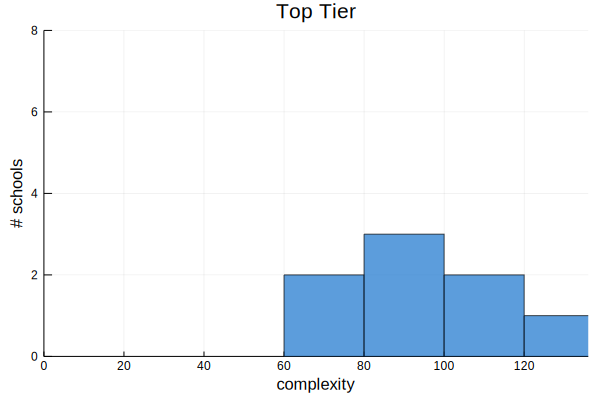

In [11]:
top_tier = Array{Curriculum,1}()
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_top"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(top_tier, val)
    end
end
metric_histogram(top_tier, "complexity", 5, title="Top Tier", xlabel="complexity", ylabel="# schools")

Process the schools in the middle tier.

Drexel_CS => 180.19999999999987
Houston_CS => 184.0
Clemson_CS => 123.0
South_Florida_CS => 250.0
Tennessee_CS => 169.0
Iowa_CS => 60.0
University_of_Georgia-CS => 77.0
University_of_Kentucky-CS => 144.0
University_of_Arizona-CS => 108.0
New_Hampshire_CS => 123.0


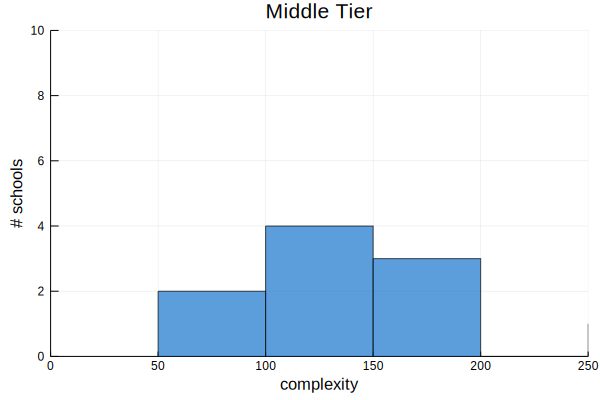

In [14]:
middle_tier = Array{Curriculum,1}()
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_middle"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(middle_tier, val)
    end
end
metric_histogram(middle_tier, "complexity", 5, title="Middle Tier", xlabel="complexity", ylabel="# schools")

Process the schools in the bottom tier.

University_of_Wisconsin_Milwaukee-CS => 143.0
Mississippi_State-CS => 165.0
University_of_Missouri-CS => 173.0
Oklahoma_CS => 162.0
University_of_Tulsa-CS => 145.0
Texas_Tech-CS => 256.0
University_of_Michigan_Dearborn-CS => 167.0
Boston_College-CS => 74.0
New_Mexico_Institute_of_Mining_and_Technology-CS => 270.0
Montana_State-CS => 105.0
Wyoming-CS => 174.0
Missouri_University_of_Science_and_Technology-CS => 136.0
University_of_Arkansas-Little_Rock-CS => 146.0
Nova_Southeastern_University-CS => 110.0
University_of_Miami-CS => 142.0


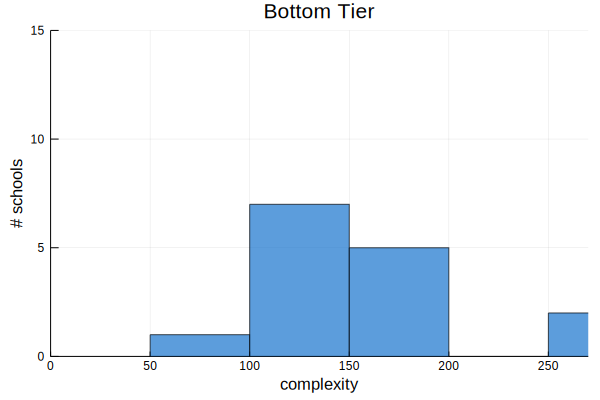

In [15]:
bottom_tier = Array{Curriculum,1}()
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_bottom"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(bottom_tier, val)
    end
end
metric_histogram(bottom_tier, "complexity", 5, title="Bottom Tier", xlabel="complexity", ylabel="# schools")

In [16]:
curric = read_csv("./tier_middle/Iowa_CS.csv")
visualize(curric)

Blink.AtomShell.Window(1, Blink.AtomShell.Electron(Process(`/Users/heileman/.julia/packages/Blink/AO8uN/deps/Julia.app/Contents/MacOS/Julia /Users/heileman/.julia/packages/Blink/AO8uN/src/AtomShell/main.js port 4628`, ProcessRunning), Sockets.TCPSocket(RawFD(0x00000037) active, 0 bytes waiting), Dict{String,Any}("callback"=>##1#2())), Blink.Page(1, WebSocket(server, CONNECTED), Dict{String,Any}("webio"=>##28#29{WebIOBlinkComm}(WebIOBlinkComm(Window(#= circular reference @-5 =#))),"callback"=>##1#2()), Distributed.Future(1, 1, 1, Some(true))), Task (done) @0x000000011bc74490)

## References

Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.